In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Equações Diferenciais Ordinárias

# Método de Euler:  $y_{i+1}=y_{i}+h*f(t,y)$

O método de Euler consiste em usar a integração em retângulos básica para evoluir uma equação diferencial qualquer.


1ª Ordem $y'=f(t,y)$

In [2]:
def Eul1(f,y0,t0,tf,h):
    t_v = np.arange(t0,tf,h)
    y_v = np.zeros(len(t_v))
    t_v[0] = t0
    y_v[0] = y0
    
    for i in range (1,len(t_v),1):
        y_v[i] = y_v[i-1] + h*f(t_v[i-1],y_v[i-1])
        t_v[i] = t_v[i-1] + h
        
    return y_v        

Vamos testar num exemplo de equação diferencial básica $y' = y$, cuja solução deveria ser uma exponencial.

Text(0, 0.5, '$e$')

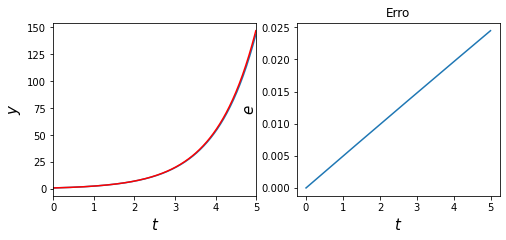

In [3]:
# função à integrar
def f(t,y):
    return y

# condição inicial
t0 = 0
y0 = 1
h = 0.01 # tamanho do intervalo de integração
tf = 5 # limite de integração

t_v = np.arange(t0,tf,h)
y_v = Eul1(f,y0,t0,tf,h)

plt.figure(figsize=(8,7))
plt.subplot(2,2,1)
plt.plot(t_v,y_v)
plt.plot(t_v,np.exp(t_v),'r')
plt.xlim(t0,tf)
plt.xlabel("$t$",fontsize=15)
plt.ylabel("$y$",fontsize=15)


plt.subplot(2,2,2)
plt.title('Erro')
plt.plot(t_v, np.abs(y_v-np.exp(t_v))/np.exp(t_v))
plt.xlabel("$t$",fontsize=15)
plt.ylabel("$e$",fontsize=15)

2ª Ordem: $y"=f(t,y,z)$, com $z=y'$

Também podemos escrever a função de forma a resolver equações de segunda ordem.

In [5]:
# z = y'
def Eul2(f,y0,z0,t0,tf,h):
    t_v=np.arange(t0,tf,h)
    y_v=np.zeros(len(t_v))
    z_v=np.zeros(len(t_v))
    t_v[0]=t0
    y_v[0]=y0
    z_v[0]=z0
    
    for i in range (1,len(t_v),1):
        y_v[i]=y_v[i-1]+h*z_v[i-1]
        z_v[i]=z_v[i-1]+h*f(t_v[i-1],y_v[i-1],z_v[i-1])
        t_v[i]=t_v[i-1]+h
        
    return y_v,z_v

E para testar vamos usar o exemplo do oscilador harmônico amortecido:

Text(0, 0.5, "$y'$")

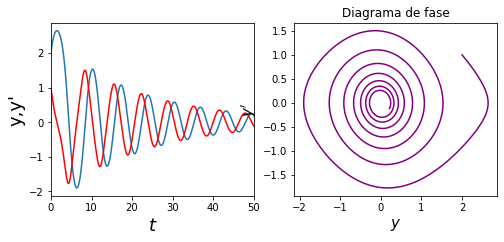

In [17]:
# pendulo e amortecido
def g(t,y,z):
    return -0.1*z - np.sin(y)


# condições iniciais
t0 = 0
tf = 50
y0 = 2
z0 = 1
h = 0.01

t_v=np.arange(t0,tf,h)
y_v=Eul2(g,y0,z0,t0,tf,h)[0]
z_v=Eul2(g,y0,z0,t0,tf,h)[1]

plt.figure(figsize=(8,7))
plt.subplot(2,2,1)
plt.plot(t_v,y_v)
plt.plot(t_v,z_v,'r')
plt.xlim(t0,tf)
plt.xlabel("$t$",fontsize=18)
plt.ylabel("y,y'",fontsize=18)

plt.subplot(2,2,2)
plt.title('Diagrama de fase')
plt.plot(y_v,z_v,'purple')
plt.xlabel("$y$",fontsize=15)
plt.ylabel("$y'$",fontsize=15)

# Método de Runge-Kutta clássico: $y_{i+1}=y_{i}+(k_{1}+2*k_{2}+2*k_{3}+k_{4})/6$

O método de Runge-kutta envolve usar o método de integração dos trapézios dentro do método de Euler de resolver equações diferenciais. Ele é mais sofisticado e dificil de explicar, mas funciona que é uma beleza!

1ª Ordem $y'=f(t,y)$

In [11]:
def RKO1(f,y0,t0,tf,h):
    t_v = np.arange(t0,tf,h)
    y_v = np.zeros(len(t_v))
    t_v[0] = t0
    y_v[0] = y0
    
    for i in range (1,len(t_v),1):
        k1 = h*f(t_v[i-1],y_v[i-1])
        k2 = h*f(t_v[i-1]+h/2,y_v[i-1]+k1/2)
        k3 = h*f(t_v[i-1]+h/2,y_v[i-1]+k2/2)
        k4 = h*f(t_v[i-1]+h/2,y_v[i-1]+k3/2)
        y_v[i] = y_v[i-1]+(k1+2*k2+2*k3+k4)/6
        t_v[i] = t_v[i-1]+h
    
    return y_v

Aplicando para o problema da exponencial:

Text(0, 0.5, '$e$')

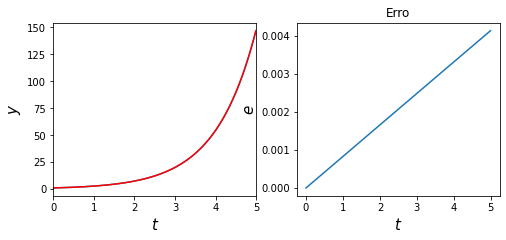

In [13]:
# condição inicial
t0 = 0
y0 = 1
h = 0.01 # tamanho do intervalo de integração
tf = 5 # limite de integração

t_v = np.arange(t0,tf,h)
y_v = RKO1(f,y0,t0,tf,h)


plt.figure(figsize=(8,7))
plt.subplot(2,2,1)
plt.plot(t_v,y_v)
plt.plot(t_v,np.exp(t_v),'r')
plt.xlim(t0,tf)
plt.xlabel("$t$",fontsize=15)
plt.ylabel("$y$",fontsize=15)


plt.subplot(2,2,2)
plt.title('Erro')
plt.plot(t_v, np.abs(y_v-np.exp(t_v))/np.exp(t_v))
plt.xlabel("$t$",fontsize=15)
plt.ylabel("$e$",fontsize=15)

2ª Ordem: $y"=f(t,y,z)$, com $z=y'$

E agora em segunda ordem:

In [14]:
def RKO2(f,y0,z0,t0,tf,h):
    t_v = np.arange(t0,tf,h)
    z_v = np.zeros(len(t_v))
    y_v = np.zeros(len(t_v))
    t_v[0] = t0
    z_v[0] = z0
    y_v[0] = y0
    
    for i in range (1,len(t_v),1):
        k1y = h*z_v[i-1]
        k1z = h*f(t_v[i-1],y_v[i-1],z_v[i-1])
        k2y = h*(z_v[i-1] + k1z/2)
        k2z = h*f(t_v[i-1]+h/2,y_v[i-1]+k1y/2,z_v[i-1]+k1z/2)
        k3y = h*(z_v[i-1] + k2z/2)
        k3z = h*f(t_v[i-1]+h/2,y_v[i-1]+k2y/2,z_v[i-1]+k2z/2)
        k4y = h*(z_v[i-1] + k3z/2)
        k4z = h*f(t_v[i-1]+h/2,y_v[i-1]+k3y/2,z_v[i-1]+k3z/2)
        
        y_v[i] = y_v[i-1]+(k1y+2*k2y+2*k3y+k4y)/6
        z_v[i] = z_v[i-1]+(k1z+2*k2z+2*k3z+k4z)/6
        t_v[i] = t_v[i-1]+h
    
    return y_v, z_v

Text(0, 0.5, "$y'$")

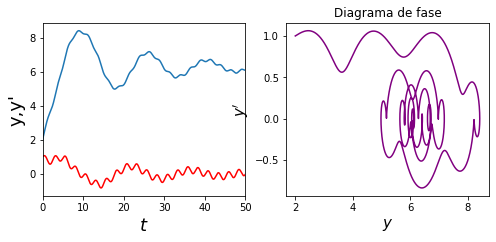

In [18]:
# pêndulo forçado e amortecido
def g(t,y,z):
    return -0.1*z + 0.5*np.cos(t/0.4) - 0.2*np.sin(y)

# condições iniciais
t0 = 0
tf = 50
y0 = 2
z0 = 1
h = 0.01

t_v = np.arange(t0,tf,h)
y_v = RKO2(g,y0,z0,t0,tf,h)[0]
z_v = RKO2(g,y0,z0,t0,tf,h)[1]

plt.figure(figsize=(8,7))
plt.subplot(2,2,1)
plt.plot(t_v,y_v)
plt.plot(t_v,z_v,'r')
plt.xlim(t0,tf)
plt.xlabel("$t$",fontsize=18)
plt.ylabel("y,y'",fontsize=18)

plt.subplot(2,2,2)
plt.title('Diagrama de fase')
plt.plot(y_v,z_v,'purple')
plt.xlabel("$y$",fontsize=15)
plt.ylabel("$y'$",fontsize=15)

Agora pra terminar, vamos comparar a precisão dos dois métodos para tratar uma equação de segunda ordem caótica e complicada.

In [22]:
def g(t,y,z):
    return z - y + t**3 - 3*t**2 + 6*t


t0 = 0
tf = 6.01
y0 = 0
z0 = 0
h = 0.01

t_v = np.arange(t0,tf,h)

y_ve = Eul2(g,y0,z0,t0,tf,h)[0]
z_ve = Eul2(g,y0,z0,t0,tf,h)[1]

y_vr = RKO2(g,y0,z0,t0,tf,h)[0]
z_vr = RKO2(g,y0,z0,t0,tf,h)[1]
n = len(t_v)-1


print('Método - t_f - y_f - z_f')
print('por Euler:',t_v[n],'-',y_ve[n],'-',z_ve[n])
print('por RK:',t_v[n],'-',y_vr[n],'-',z_vr[n])
print('analítico:',6,'-',6**3,'-',3*6**2)

print('\nMétodo - e_y - e_z')
print('erro Euler:',np.abs(y_ve[n]-6**3)/6**3,'-',np.abs(z_ve[n]-108)/108,'\nerro RK4:',np.abs(y_vr[n]-6**3)/6**3,'-',np.abs(z_vr[n]-108)/108)

Método - t_f - y_f - z_f
por Euler: 6.0 - 217.37070851256237 - 108.88803333927842
por RK: 6.0 - 216.22523448460308 - 108.1435150791282
analítico: 6 - 216 - 108

Método - e_y - e_z
erro Euler: 0.006345872743344322 - 0.008222530919244651 
erro RK4: 0.0010427522435327687 - 0.0013288433252611753
